# Project Title : Mall customer

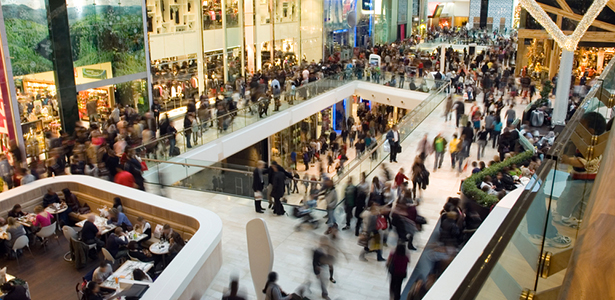

In [2]:
from IPython.display import Image
Image(filename='img.jpg')

## Project Overview :

### The Mall Customers dataset is commonly used for customer segmentation and marketing analysis. It contains data about customers' spending habits and demographic details, allowing analysts and data scientists to identify patterns and group customers with similar characteristics. Here’s an overview of the dataset's structure and potential features.

### CustomerID : Unique ID assigned to the customer 
### Gender : Gender of the customer
### Age : Age of the customer
### Annual Income (k$) : Annual Income of the customer
### Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Explore Data

In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Transform Data

In [10]:
label = LabelEncoder()
df.Gender = label.fit_transform(df.Gender)

In [11]:
df['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [21]:
scaler = StandardScaler()
x_df = scaler.fit_transform(df.iloc[: ,2:5])

In [22]:
Clusters = []
Inertia = []

for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(df)
    Inertia.append(model.inertia_)
    Clusters.append(i)

result = pd.DataFrame({
    'Clusters' : Clusters,
    'Insertia' : Inertia
})
result.set_index('Clusters')


,Insertia
Clusters,
1,975512.060000
2,387065.713771
3,271396.562966
4,195401.198560
5,157620.971480
6,122637.557961
7,103233.017244
8,86026.534305
9,76917.615882


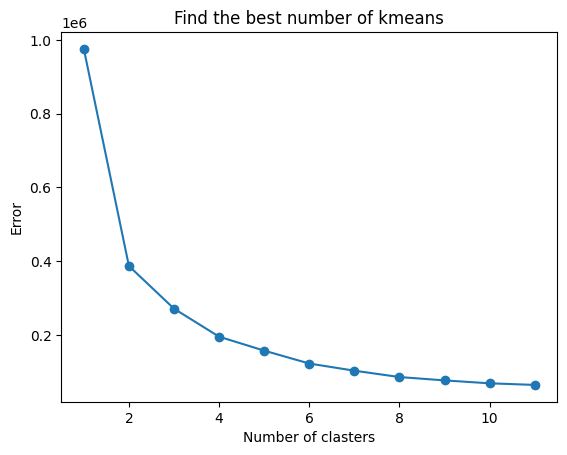

In [23]:
plt.plot(Clusters,Inertia,marker='o')
plt.title('Find the best number of kmeans')
plt.xlabel('Number of clasters')
plt.ylabel('Error')
plt.show()

## Creating Model

In [26]:
k=4 
model = KMeans(n_clusters=k)
model.fit(df)
pred = model.predict(df)

In [27]:
# Addition column that includes predictions to df
df['k-means'] = pred

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k-means
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [29]:
df['k-means'].unique()

array([1, 2, 3, 0], dtype=int32)

In [30]:
df1= df[df['k-means']==0]
df2= df[df['k-means']==1]
df3= df[df['k-means']==2]
df4= df[df['k-means']==3]

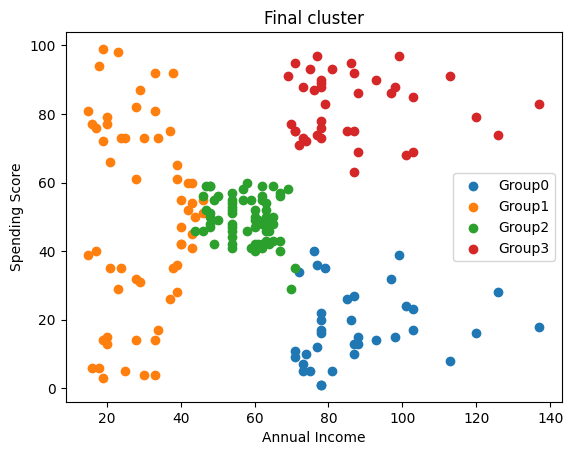

In [31]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group2')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group3')

plt.title('Final cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Data Analysis

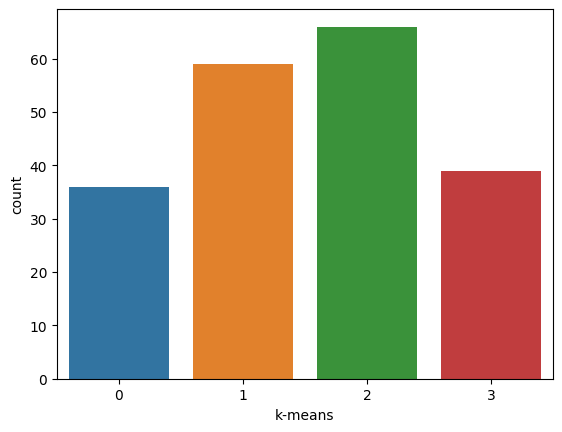

In [33]:
sns.countplot(x='k-means', data=df)
plt.show()

In [34]:
df['k-means'].value_counts()

k-means
2    66
1    59
3    39
0    36
Name: count, dtype: int64

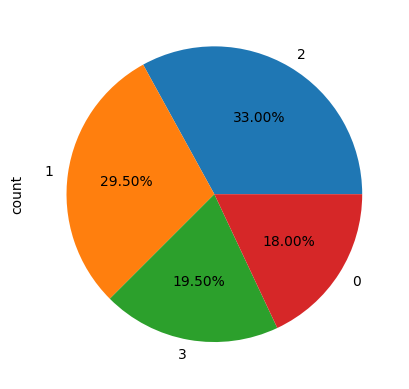

In [35]:
df['k-means'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

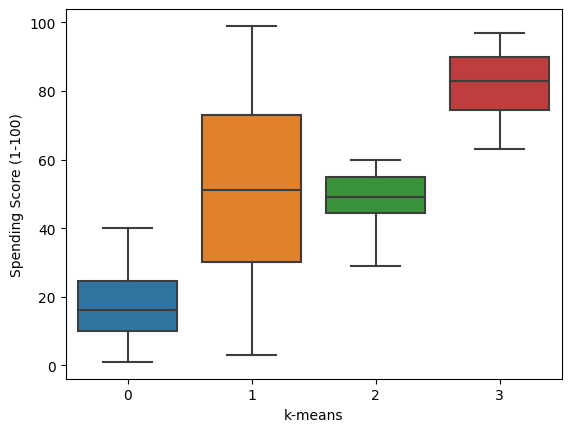

In [36]:
sns.boxplot(data=df,x='k-means',y='Spending Score (1-100)')
plt.show()

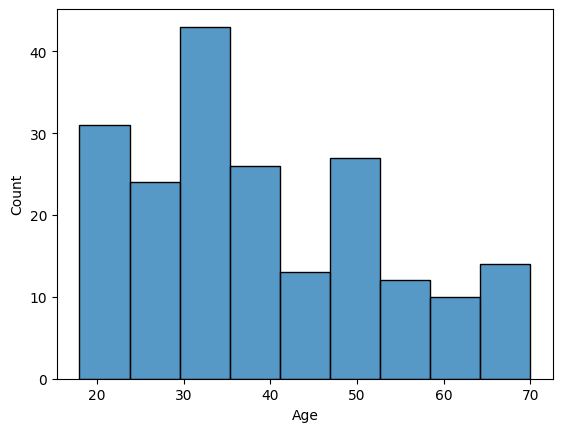

In [37]:
sns.histplot(df.Age)
plt.show()

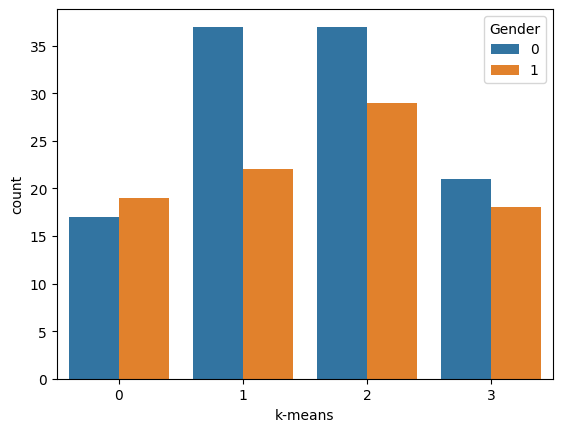

In [38]:
sns.countplot(x='k-means',hue=df.Gender, data=df)
plt.show()

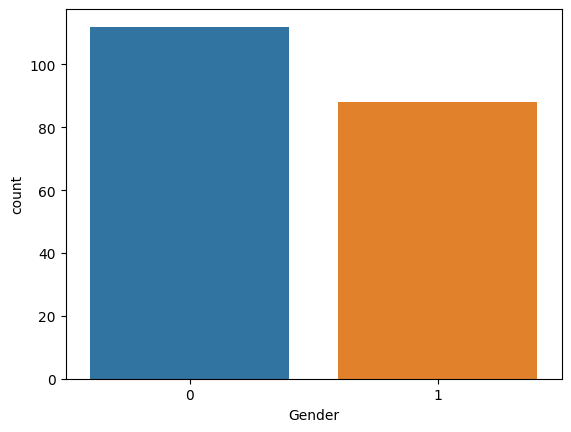

In [39]:
sns.countplot(data=df, x='Gender')
plt.show()

# Conclusion

### This dataset is great for understanding how to deal with unpsupervised learning problems. It presents the opportunity to work on a Business Problem that can be utilized for creating varied strategies to boost sales.

### For K-Means clustering algorithm, selection of the hyperparameter k is crucial and it is done with the help of statistical tests. There is not much difference in model performance when trained on the original dataset or normalized dataset in this case.